# 8TeV MC validation

In [1]:
run ../prep_ana.py

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Loading plotting specs...
8 or 13 TeV:8TeV
unc_mc_process and scales as dictionaries
Load MC and Data?True
Correct MET?True
df = pd.concat([df_dy0, df_dy1, df_dy2, df_dy3, df_dy4, df_dy_m_10, df_ww, df_tt_l, df_tt_sl, df_zz_ln, df_wz_ln, df_wz_lq ])


In [2]:
%matplotlib inline

In [3]:
df_da_a = rp.read_root(data_path+"/muon_2012A_complete.root", columns=columns+["runNum", "eventNumb"])
df_da_b = rp.read_root(data_path+"/muon_2012B_complete.root", columns=columns+["runNum", "eventNumb"])
df_da_c = rp.read_root(data_path+"/muon_2012C_complete.root", columns=columns+["runNum", "eventNumb"])
df_da_d = rp.read_root(data_path+"/muon_2012D_complete.root", columns=columns+["runNum", "eventNumb"])

df_da = pd.concat([df_da_a, df_da_b, df_da_c, df_da_d]).reset_index()

In [5]:
df_da_a_el = rp.read_root(data_path+"/electron_2012A_complete.root", columns=columns+["runNum", "eventNumb"])
df_da_b_el = rp.read_root(data_path+"/electron_2012B_complete.root", columns=columns+["runNum", "eventNumb"])
df_da_c_el = rp.read_root(data_path+"/electron_2012C_complete.root", columns=columns+["runNum", "eventNumb"])
df_da_d_el = rp.read_root(data_path+"/electron_2012D_complete.root", columns=columns+["runNum", "eventNumb"])

df_da_el = pd.concat([df_da_a_el, df_da_b_el, df_da_c_el, df_da_d_el]).reset_index()
df_da = pd.concat( [df_da, df_da_el] ).reset_index()
df_da = df_da.drop(np.where(df_da[["runNum", "eventNumb"]].duplicated())[0])

(<matplotlib.figure.Figure at 0x123ca5950>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x123cbb510>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x252acb990>], dtype=object))

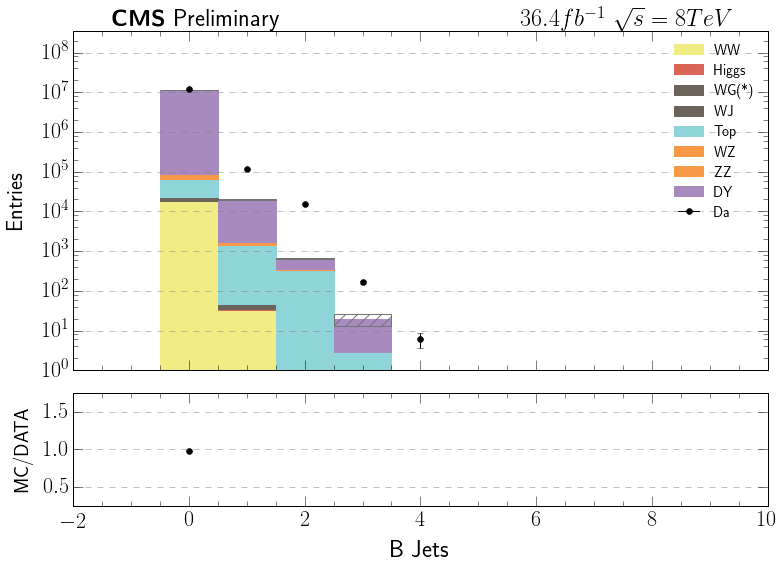

In [6]:
mc = bin_df( df[df.mll > 30], "numb_BJet",range=(-.5,9.5), bins=10)
da = bin_df( df_da[df_da.mll > 30], "numb_BJet",range=(-.5,9.5), bins=10)

full_plot(mc, da, color="color_1", title="B Jets")

# Control Regions

## WW control region

In [ ]:
mc_ww = cuts_ana(df[df.mll >= 30])
da_ww = cuts_ana(df_da[df_da.mll >= 30 ])

mc = bin_df(mc_ww, "mll", scales=scales, )
da = bin_df(da_ww, "mll",  scales=scales, )
full_plot(mc, da, color="color_1", logy=False, y_range=(0,np.max(da["Da"][0])+50))

## TTbar control region

In [ ]:
mc_tt = TT_ana(df[df.mll > 30])
da_tt = TT_ana(df_da[df_da.mll > 30])

mc = bin_df(mc_tt, "mll",)
da = bin_df(da_tt, "mll",)
full_plot(mc, da, color="color_1")

## Drell Yan control region

In [ ]:
mc_dy = DY_ana(df)
da_dy = DY_ana(df_da)

mc = bin_df(mc_dy, "mll",)
da = bin_df(da_dy, "mll",)
full_plot(mc, da, color="color_1")

## Z &rarr; &tau; &tau; control region

In [ ]:
feature = 'mll'
df_mc = Z_tt_ana(df)
df_data = Z_tt_ana(df_da)

#bins_mc_ = bin_df( df_mc[df_mc.lep1_Charge == df_mc.lep2_Charge], feature, )#weights=False) 
#bins_data_ = bin_df( df_data[df_data.lep1_Charge == df_data.lep2_Charge], feature, )

#sum_mc = np.zeros(bins_mc["WW"][0].shape[0])
#for k in bins_mc.keys():
#    if k in ['ttbar_semileptonic', 'ttbar_leptonic', 'DYJetsToLL_M-50', 'WZJetsTo3LNu', 'WW',
# 'Tbar_tW-channel','T_t-channel','ZZJetsTo2L2Nu', 'WGToLNuG']:
#        sum_mc += bins_mc_[k][0]
#
#sum_mc = bins_data_["Da"][0] - sum_mc

mc = bin_df(df_mc, "mll", plotting_options=plotting_options, scales=scales, bins=25, range=(60,120))
da = bin_df(df_data, "mll", plotting_options=plotting_options, scales=scales, bins=25, range=(60,120))

#for process in ['W1JetsToLNu', 'W2JetsToLNu', 'W3JetsToLNu', 'W4JetsToLNu']:
#    mc[process][0] = mc[process][0] * 0
#    mc[process][3] = mc[process][3] * 0

#mc['W1JetsToLNu'][0] = sum_mc
#mc['W1JetsToLNu'][3] = sum_mc
full_plot(mc, da, color="color_1", logy=False, y_range=(0,100))

## Higgs Control Region

In [ ]:
def higgs_ana( df ):
    #At 8TeV one should expect about 200 events 
    n_bjets = df.numb_BJet == 0 
    n_jets = df.numb_jets <= 2
    mll = df.mll < 55
    dPhill = df.dPhiLL < 1.8
    dPhillMET = df.dPhiLLMET < 1.57
    
    return df[ n_bjets & n_jets & mll & dPhill & dPhillMET]

# Addition regions

## Pre cuts

In [ ]:
mc_dy = pre_cuts(df[df.mll > 30])
da_dy = pre_cuts(df_da[df_da.mll > 30])

mc = bin_df(mc_dy, "mll",)
da = bin_df(da_dy, "mll",)
full_plot(mc, da, color="color_1")

## Custom WW control region

In [ ]:
def test_WW_ana( df, n_jets=0, met=50 ):
  initial_cuts = (df.mll > 50 )  & (df.numbExtraLep == 0) & (df.numb_jets <=  n_jets) & ( df.metMod > met ) & ( df.metMod < 150 )
  dif_flavor_cut = (df.lep_Type > 0)

  basic_df_0j_cuts = initial_cuts & dif_flavor_cut
  return df[basic_df_0j_cuts] 

In [ ]:
mc_dy = test_WW_ana(df, n_jets=1)
da_dy = test_WW_ana(df_da, n_jets=1)

mc = bin_df(mc_dy, "mll",)
da = bin_df(da_dy, "mll",)
full_plot(mc, da, color="color_1")

In [ ]:
mc_dy = test_WW_ana(df, n_jets=2)
da_dy = test_WW_ana(df_da, n_jets=2)

mc = bin_df(mc_dy, "mll",)
da = bin_df(da_dy, "mll",)
full_plot(mc, da, color="color_1")

In [ ]:
mc_dy = test_WW_ana(df, met=40)
da_dy = test_WW_ana(df_da, met=40)

mc = bin_df(mc_dy, "mll",)
da = bin_df(da_dy, "mll",)
full_plot(mc, da, color="color_1")

In [ ]:
mc_dy = test_WW_ana(df, met=30)
da_dy = test_WW_ana(df_da, met=30)

mc = bin_df(mc_dy, "mll",)
da = bin_df(da_dy, "mll",)
full_plot(mc, da, color="color_1")

## Custom Z &rarr; &tau; &tau; region

In [ ]:
def test_Z_tt_ana( df ):
    initial_cuts = (df.mll > 50 )  & (df.numbExtraLep == 0) & (df.numb_jets ==  0) & ( df.qT < 30 )
   
    dif_flavor_cut = (df.lep_Type > 0)
   
    m_1 = (df.mll < 120) & (df.mll > 75)
    met_1 = (df.metMod > 30) & (df.metMod < 80)

    return df[ initial_cuts & met_1 & m_1 & dif_flavor_cut ]

In [ ]:
mc = test_Z_tt_ana(df,)
da = test_Z_tt_ana(df_da,)

mc = bin_df(mc, "dPhiLL",range=(1.,3.5), bins=25)
da = bin_df(da, "dPhiLL",range=(1.,3.5), bins=25)
full_plot(mc, da, color="color_1",logy=False, y_range=(0,np.max(da["Da"][0])+50) )

# Make all the plots

In [ ]:
#make_control_plots( pre_cuts(df[df.mll > 30], diff_charge=False), pre_cuts(df_da[df_da.mll > 30], diff_charge=False), "mar", "pre", energy_dir= "8TeV" )
make_control_plots( df[df.mll > 30], df_da[df_da.mll > 30], "mar", "full", energy_dir= "8TeV" )

In [ ]:
flavor = "same"
feature = "metMod"

mc = cuts_ana( df, flavor=flavor )
da = cuts_ana( df_da, flavor=flavor )

bins_wj = wjets_selection(mc, da, feature)

bins_mc = bin_df(mc[mc.lep1_Charge != mc.lep2_Charge], feature, )
bins_da = bin_df(da[da.lep1_Charge != da.lep2_Charge], feature, )

k_ = None
for k in bins_mc.keys():
    if k in ['W1JetsToLNu', 'W2JetsToLNu', 'W3JetsToLNu', 'W4JetsToLNu']:
        k_ = k
        bins_mc[k][0] = bins_mc[k][0]*0
        bins_mc[k][3] = bins_mc[k][3]*0
print k_
if k_ == None:
    k_ = 'W1JetsToLNu'
    bins_mc[k_] = bins_mc["WW"]
bins_mc[k_][0] = bins_wj
bins_mc[k_][3] = bins_wj
full_plot(bins_mc, bins_da, color="color_1",logy=False, y_range=(0,np.max(bins_da["Da"][0])+50) )

In [ ]:
create_kinematic_hist(cuts_ana(df, flavor="same"), cuts_ana(df_da, flavor="same"), prefix="cuts_same")

# END

In [ ]:
process_yields(cuts_ana(df, flavor="both"))

In [ ]:
df_yields = process_yields(cuts_ana(df[df.lep1_Charge != df.lep2_Charge], flavor="both"))
save_df_to_html( df_yields, "yields.html_")

In [ ]:
print cuts_ana(df_da, flavor="same").shape, cuts_ana(df_da, flavor="diff").shape

In [ ]:
scales['WGToLNuG'] = 1.82

In [ ]:
19.7e3 * 2.88 * 500. / 4800000.

In [ ]:
def cross_calc(df_mc, df_data, flavor="both"):
    lumi = 19.7e3
    eff  = .122 #this had to be changed previously
    Br   = (3*.108)**2. 
    
    df_mc_c = df_mc[df_mc.lep1_Charge != df_mc.lep2_Charge]
    df_data_c = df_data[df_data.lep1_Charge != df_data.lep2_Charge]
    
    df_mc_c_s = df_mc[df_mc.lep1_Charge == df_mc.lep2_Charge]
    df_data_c_s = df_data[df_data.lep1_Charge == df_data.lep2_Charge]
    
    N_mc = np.array([ cuts_ana(df_mc_c[df_mc_c.process_decay == process], flavor=flavor).weight.values.sum()*scales[process] for process in scales.keys() if process not in ['WW', 'W1JetsToLNu','W2JetsToLNu','W3JetsToLNu','W3JetsToLNu'] ]).sum()
    N_mc += cuts_ana(df_data_c_s, flavor=flavor).shape[0] -  np.array([ cuts_ana(df_mc_c_s[(df_mc_c_s.process_decay == process) ], flavor=flavor).shape[0]*scales[process] for process in scales.keys() if process not in [ 'W1JetsToLNu','W2JetsToLNu','W3JetsToLNu','W3JetsToLNu'] ]).sum()
    
    N_data = cuts_ana(df_data_c, flavor=flavor).shape[0]
    
    N_ww_select = cuts_ana(df_mc_c[df_mc_c.process_decay == "WW"], flavor=flavor).shape[0]*scales["WW"]
    N_ww_tot = df_mc[df_mc.process_decay == "WW"].shape[0]*scales["WW"]
    
    print "MC", N_mc
    print "DATA", N_data
    print N_ww_select / N_ww_tot
    
    return (N_data - N_mc) / (lumi * eff * Br * N_ww_select / N_ww_tot)
    #return N_ww_select / (lumi * eff * Br * N_ww_select / N_ww_tot)

In [ ]:
def calc_cross_stuff(df_mc, df_data, flavor="both"):
    lumi = 19.7e3
    eff  = .122 #this had to be changed previously
    Br   = (3*.108)**2. 
    
    df_mc_c = df_mc[df_mc.lep1_Charge != df_mc.lep2_Charge]
    df_data_c = df_data[df_data.lep1_Charge != df_data.lep2_Charge]
    
    df_mc_c_s = df_mc[df_mc.lep1_Charge == df_mc.lep2_Charge]
    df_data_c_s = df_data[df_data.lep1_Charge == df_data.lep2_Charge]
    
    N_mc = np.array([ cuts_ana(df_mc_c[df_mc_c.process_decay == process], flavor=flavor).shape[0]*scales[process] for process in scales.keys() if process not in ['WW', 'W1JetsToLNu','W2JetsToLNu','W3JetsToLNu','W3JetsToLNu'] ]).sum()
    N_mc += cuts_ana(df_data_c_s, flavor=flavor).shape[0] -  np.array([ cuts_ana(df_mc_c_s[(df_mc_c_s.process_decay == process) ], flavor=flavor).shape[0]*scales[process] for process in scales.keys() if process not in [ 'W1JetsToLNu','W2JetsToLNu','W3JetsToLNu','W3JetsToLNu'] ]).sum()
    
    N_data = cuts_ana(df_data_c, flavor=flavor).shape[0]
    
    N_ww_select = cuts_ana(df_mc_c[df_mc_c.process_decay == "WW"], flavor=flavor).shape[0]*scales["WW"]
    N_ww_tot = df_mc[df_mc.process_decay == "WW"].shape[0]*scales["WW"]

    ratio_s_t = N_ww_select / N_ww_tot
    print "MC", N_mc
    print "DATA", N_data
    print N_ww_select / N_ww_tot
    return {"lumi": lumi, "eff": eff, "Br": Br, "N_mc": N_mc, "N_data": N_data, "ratio_s_t": ratio_s_t, "N_ww_select":N_ww_select}

def stat_unc_calc(df_mc, df_data, flavor="both"):
    var = calc_cross_stuff(df_mc, df_data, flavor)
    var["lumi"] = lumi
    var["eff"]  = eff
    var["Br"]   = Br
    var["N_mc"] = N_mc
    var["N_data"] = N_data
    var["ratio_s_t"] = ratio_s_t
    var["N_ww_select"] = N_ww_select
    
    return 1. / (lumi * eff * Br * ratio_s_t)  * ( N_data +  )**.5

In [ ]:
df.process_decay.unique()

In [ ]:
cross_calc(df, df_da, flavor="diff")

In [ ]:
(4910. - 2654. - 200) / (19.7e3 * .122 * (3.*.108)**2. * 0.2148)

In [ ]:
flavor = "same"
cuts_ana(df_da[df_da.lep1_Charge == df_da.lep2_Charge], flavor).shape[0] - np.array([ cuts_ana(df[(df.process_decay == process) & (df.lep1_Charge == df.lep2_Charge)], flavor=flavor).weight.values.sum()*scales[process] for process in scales.keys() if process not in [ 'W1JetsToLNu','W2JetsToLNu','W3JetsToLNu','W3JetsToLNu'] ]).sum()


In [ ]:
scales.keys()

In [ ]:
df.weight

In [ ]:
70./ 57. 